In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Leitura de Arquivos

In [2]:
path_bill = "../2 - Arquivo Tratado/2022_forbes_billionaires.csv"
path_happy = "../2 - Arquivo Tratado/Happy_2019.csv"
path_HDI = "../2 - Arquivo Tratado/Human Development Index.csv"
path_suicide = "../2 - Arquivo Tratado/Suicide_master.csv"
path_efw = "../2 - Arquivo Tratado/efw_cc.csv"

## POP e GPD datasets 

path_pop = "../2 - Arquivo Tratado/populationbycountry19802010millions.csv"
path_GDP = "../2 - Arquivo Tratado/GDP/gdp.csv"
path_GDP_growth = "../2 - Arquivo Tratado/GDP/gdp.csv"
path_GDP_PPP = "../2 - Arquivo Tratado/GDP/gdp_ppp.csv"
path_GDP_PPP_per_capita = "../2 - Arquivo Tratado/GDP/gdp_ppp_per_capita.csv"

In [3]:
data_bill = pd.read_csv(path_bill, sep=',')
data_happy = pd.read_csv(path_happy, sep=',')
data_HDI = pd.read_csv(path_HDI, sep=',')
data_suicide = pd.read_csv(path_suicide, sep=',')
data_efw = pd.read_csv(path_efw, sep=',')

## POP e GPD datasets

data_pop = pd.read_csv(path_pop, sep=',', index_col = 0)
data_GDP = pd.read_csv(path_GDP, sep=',', index_col = 0)
data_GDP_growth = pd.read_csv(path_GDP_growth, sep=',', index_col = 0)
data_GDP_PPP = pd.read_csv(path_GDP_PPP, sep=',', index_col = 0)
data_GDP_PPP_per_capita = pd.read_csv(path_GDP_PPP_per_capita, sep=',', index_col = 0)

The Economic Freedom Index is measured in 5 broad areas and they are,

Area 1: Size of Government - As government spending, taxation, and the size of government-controlled 
enterprises increase, government decision-making is substituted for individual choice and economic freedom 
is reduced.

Area 2: Legal System and Property Rights - Protection of persons and their rightfully acquired property is
a central element of both economic freedom and civil society. Indeed, it is the most important function of 
government.

Area 3: Sound Money - Inflation erodes the value of rightfully earned wages and savings. Sound money is thus 
essential to protect property rights. When inflation is not only high but also volatile, it becomes difficult 
for individuals to plan for the future and thus use economic freedom effectively.

Area 4: Freedom to Trade Internationally - Freedom to exchange—in its broadest sense, buying, selling, making 
contracts, and so on—is essential to economic freedom, which is reduced when freedom to exchange does not include
businesses and individuals in other nations.

Area 5: Regulation - Governments not only use a number of tools to limit the right to exchange internationally, 
they may also develop onerous regulations that limit the right to exchange, gain credit, hire or work for whom 
you wish, or freely operate your business.

## Primeira vizualização e tratamento dos datasets.

In [4]:
data_bill.drop('Unnamed: 0', axis=1, inplace=True)
data_bill.set_index('rank')

,name,networth,age,country,source,industry
rank,,,,,,
1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
4,Bill Gates,$129 B,66,United States,Microsoft,Technology
5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...
2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail


In [5]:
data_bill['networth']=data_bill['networth'].str.replace('$','')
data_bill['networth']=data_bill['networth'].str.replace(' B','')
data_bill['networth']=data_bill['networth'].apply(pd.to_numeric)

C:\Users\DellWyse\AppData\Local\Temp\ipykernel_1840\2111969858.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_bill['networth']=data_bill['networth'].str.replace('$','')


In [6]:
datas = [data_bill, 
         data_happy, 
         data_HDI, 
         data_suicide, 
         data_efw, 
         data_pop, 
         data_GDP, 
         data_GDP_growth, 
         data_GDP_PPP, 
         data_GDP_PPP_per_capita]

In [7]:
# Billionaries
datas[1].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
# Happyness
datas[2].columns

Index(['HDI Rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [9]:
# HDI
datas[3].year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [10]:
# Suicide
datas[4].year.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1995, 1990, 1985, 1980, 1975,
       1970], dtype=int64)

In [11]:
datas[3][datas[3]['country'] == 'Brazil'].sample(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4236,Brazil,1990,male,15-24 years,731,14568361,5.02,Brazil1990,0.608,"461,951,782,000",3516,Generation X
4261,Brazil,1992,female,75+ years,36,1221291,2.95,Brazil1992,NaN,"400,599,250,000",2924,G.I. Generation
4228,Brazil,1989,female,25-34 years,247,12077302,2.05,Brazil1989,NaN,"425,595,310,000",3310,Boomers


<AxesSubplot:>

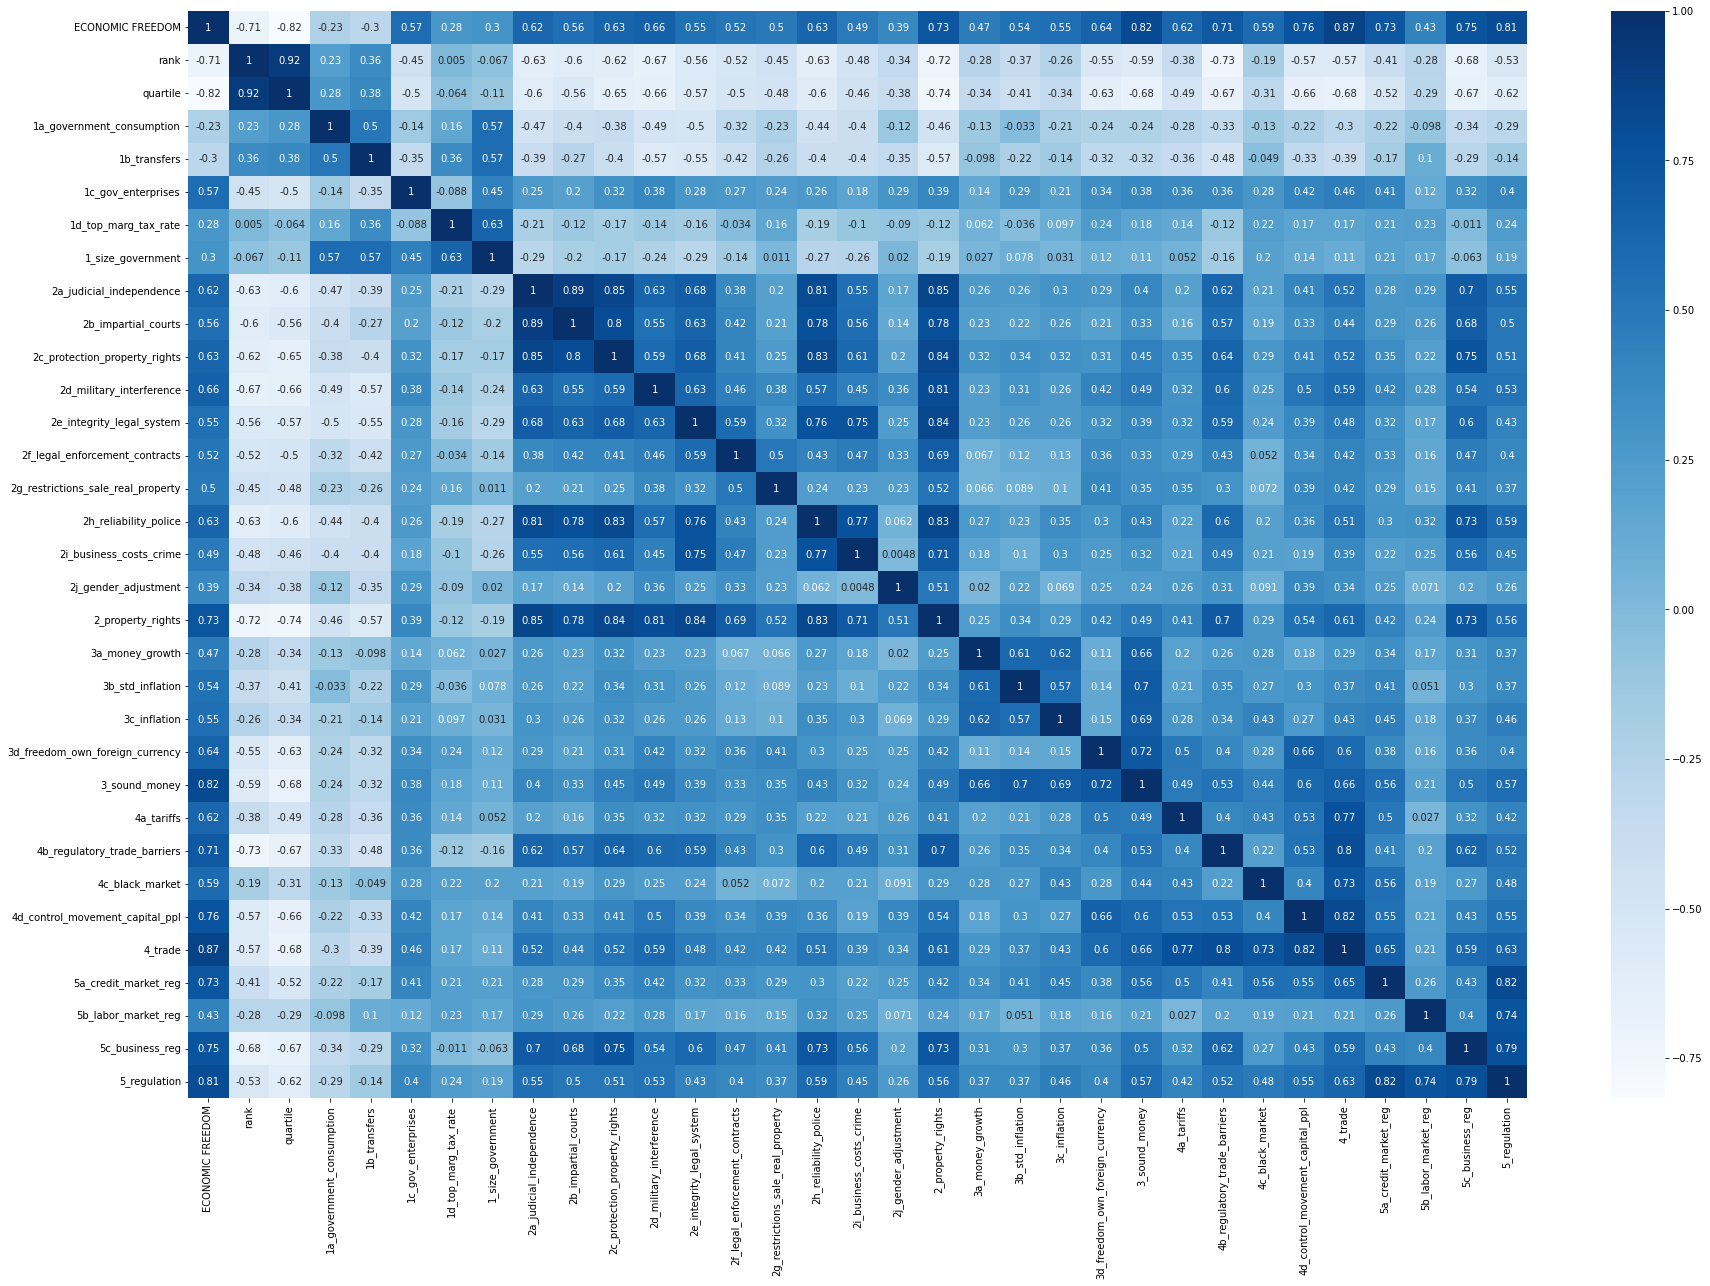

In [12]:
#data_efw[data_efw['countries'] == "Brazil"].sort_values(by='year', ascending=False)
plt.figure(figsize=(30,20))
sns.heatmap(datas[4].iloc[:, 3:].corr(), annot = True, cmap ='Blues')

In [13]:
# Population
datas[5].sample(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,83.36684,...,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886
"Gambia, The",0.67052,0.69266,0.71552,0.73914,0.764,0.79055,0.81876,0.8487,0.88042,0.91399,...,1.41305,1.45811,1.5034,1.54888,1.59451,1.64029,1.68614,1.73208,1.77808,1.82416
Paraguay,3.1716,3.25084,3.33837,3.43192,3.53055,3.63346,3.7399,3.84989,3.96344,4.08056,...,5.5234,5.62689,5.72855,5.82816,5.92554,6.02047,6.113,6.2032,6.29088,6.37583
Ukraine,--,--,--,--,--,--,--,--,--,--,...,48.50792,48.05682,47.66708,47.30539,46.95942,46.62033,46.29986,45.99429,45.7004,45.4156
Belize,0.14442,0.14921,0.1533,0.15685,0.16081,0.16556,0.17124,0.17635,0.1814,0.18643,...,0.25464,0.2613,0.26796,0.27462,0.28129,0.28795,0.29461,0.30127,0.3079,0.31452


In [14]:
# GDP
datas[6].head(5)

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,3.287706e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,1.488035e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [15]:
# GDP Growth, 
datas[7].head(5)

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,3.287706e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,1.488035e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [16]:
# GDP PPP
datas[8].head(5)

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442856e+09,3.799467e+09,3.816822e+09,3.893071e+09,3.941354e+09,4.098240e+09,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.772679e+12,1.893539e+12,2.025402e+12,2.098286e+12,2.212573e+12,2.319151e+12,2.438518e+12,2.536280e+12,2.495345e+12,NaN
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.966700e+10,6.503984e+10,6.905834e+10,7.183170e+10,7.009796e+10,7.471192e+10,7.741557e+10,8.187980e+10,8.091834e+10,NaN
Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.396677e+12,1.526772e+12,1.645122e+12,1.662297e+12,1.678674e+12,1.744087e+12,1.841811e+12,1.937451e+12,1.946297e+12,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.861242e+11,1.998656e+11,2.203648e+11,2.046036e+11,2.048747e+11,2.179873e+11,2.187486e+11,2.212628e+11,2.118373e+11,NaN


In [17]:
#  GDP PPP Per Capita

datas[8].head(5)

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442856e+09,3.799467e+09,3.816822e+09,3.893071e+09,3.941354e+09,4.098240e+09,NaN,NaN,NaN,NaN
Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.772679e+12,1.893539e+12,2.025402e+12,2.098286e+12,2.212573e+12,2.319151e+12,2.438518e+12,2.536280e+12,2.495345e+12,NaN
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.966700e+10,6.503984e+10,6.905834e+10,7.183170e+10,7.009796e+10,7.471192e+10,7.741557e+10,8.187980e+10,8.091834e+10,NaN
Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.396677e+12,1.526772e+12,1.645122e+12,1.662297e+12,1.678674e+12,1.744087e+12,1.841811e+12,1.937451e+12,1.946297e+12,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.861242e+11,1.998656e+11,2.203648e+11,2.046036e+11,2.048747e+11,2.179873e+11,2.187486e+11,2.212628e+11,2.118373e+11,NaN


Perguntas a serem respondidas:
    
1 - Qual a influência na variação ou constância do índice de liberdade econômica de um país em outros índices.

2 - Países com mais liberdade possuem melhores índices?

3 - A felicidade está relacionada com o índice de suicídios?

### Criando um DF específico de um Pais escolhido:


In [18]:
### Escolhendo os anos para criar o Índice
indice = []
indice.append([list(datas[2].columns[2:]), 
               list(datas[3].year.unique()), 
               list(datas[4].year.unique()),
               list(datas[5].columns),
               list(datas[6].columns[1:-1]),
               list(datas[7].columns[1:-1]),
               list(datas[8].columns[1:-1]),
               list(datas[9].columns[1:-1])])

for i in range(len(indice[0])):
    indice[0][i] = list(map(int, indice[0][i]))
    
lista = []

for x in range(len(indice[0])):
    lista.append(indice[0][x])

# Lista final de anos que possuem algum tipo de dado em algum dos Datasets.

indice = list(set(sum(lista, []))) 

In [60]:
list(datas[2].Country)

[' Afghanistan',
 ' Albania',
 ' Algeria',
 ' Andorra',
 ' Angola',
 ' Antigua and Barbuda',
 ' Argentina',
 ' Armenia',
 ' Australia',
 ' Austria',
 ' Azerbaijan',
 ' Bahamas',
 ' Bahrain',
 ' Bangladesh',
 ' Barbados',
 ' Belarus',
 ' Belgium',
 ' Belize',
 ' Benin',
 ' Bhutan',
 ' Bolivia (Plurinational State of)',
 ' Bosnia and Herzegovina',
 ' Botswana',
 ' Brazil',
 ' Brunei Darussalam',
 ' Bulgaria',
 ' Burkina Faso',
 ' Burundi',
 ' Cabo Verde',
 ' Cambodia',
 ' Cameroon',
 ' Canada',
 ' Central African Republic',
 ' Chad',
 ' Chile',
 ' China',
 ' Colombia',
 ' Comoros',
 ' Congo',
 ' Congo (Democratic Republic of the)',
 ' Costa Rica',
 ' Croatia',
 ' Cuba',
 ' Cyprus',
 ' Czechia',
 "Côte d'Ivoire",
 ' Denmark',
 ' Djibouti',
 ' Dominica',
 ' Dominican Republic',
 ' Ecuador',
 ' Egypt',
 ' El Salvador',
 ' Equatorial Guinea',
 ' Eritrea',
 ' Estonia',
 ' Eswatini (Kingdom of)',
 ' Ethiopia',
 ' Fiji',
 ' Finland',
 ' France',
 ' Gabon',
 ' Gambia',
 ' Georgia',
 ' Germany',


In [19]:
### Escolhendo as colunas do DF criando cópias dos DF originais, apenas com as colunas selecionadas.

for x in range(len(datas)):
    print(datas[x].columns,'\n')

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object') 

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 

Index(['HDI Rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object') 

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object') 

Index(['year', 'ISO_code', 'countries', 'ECONOMIC FREEDOM', 'rank', 'quartile',
       '1a_government_consumption', '1b_transfers', '1c_gov_enterprise

In [80]:
### Colunas DF bilionários. 
df_bill_std = data_bill[['networth', 'age', 'country', 'industry']].copy()

### Colunas DF felicidade. 
df_happy_std = data_happy[['Overall rank', 'Country or region', 'Score', 'GDP per capita',
                           'Social support', 'Healthy life expectancy',
                           'Freedom to make life choices', 'Generosity',
                           'Perceptions of corruption']].copy()
df_happy_std.columns = df_happy_std.columns.str.replace(' ', '_')

### Colunas DF IDH. 
df_HDI_std = data_HDI[['Country', '1990', '1991', '1992', '1993', '1994', '1995',
                        '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                        '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                        '2014', '2015', '2016', '2017']].copy()

### Colunas DF suicidios. 
df_suicide_std = data_suicide[['country', 'year', 'population', 'suicides/100k pop', 'HDI for year',
                               ' gdp_for_year ($) ', 'gdp_per_capita ($)']].copy()
df_suicide_std.columns = df_suicide_std.columns.str.replace(' ', '_')

### Colunas DF efw. 
df_efw_std = data_efw[['year', 'countries', 'ECONOMIC FREEDOM']].copy()
df_efw_std.columns = df_efw_std.columns.str.replace(' ', '_')

### Colunas DFs de POP e GPD complementares. 

data_pop_std = datas[5].copy()
data_GDP_std = datas[6].iloc[:, 1:-1].copy()
data_GDP_growth_std = datas[7].iloc[:, 1:-1].copy()
data_GDP_PPP_std = datas[8].iloc[:, 1:-1].copy()
data_GDP_PPP_per_capita_std = datas[9].iloc[:, 1:-1].copy()


datas_std = [df_bill_std, 
             df_happy_std, 
             df_HDI_std, 
             df_suicide_std, 
             df_efw_std,
             data_pop_std,
             data_GDP_std,
             data_GDP_growth_std,
             data_GDP_PPP_std, 
             data_GDP_PPP_per_capita_std]

### Escolhendo Pais para analise.

In [81]:
#pais = 'United States'
#pais = 'Brazil'
#pais = 'Singapore'
pais = 'Ireland'



# Padronizando DF felicidade. 
a = datas_std[1][datas_std[1]['Country_or_region'] == pais].transpose()

# Padronizando DF IDH. 
b = datas_std[2][datas_std[2]['Country'] == ' '+ pais].transpose()
rank_HDI = b.columns[0] 
b = b.iloc[1:]
b = b.reset_index()
b.columns = ['year','HDI']
b['year'] = b.year.astype(int)

# Padronizando DF suicídios. 
datas_std[3]['_gdp_for_year_($)_'] = datas_std[3]['_gdp_for_year_($)_'].str.replace(',', '')
datas_std[3]['_gdp_for_year_($)_'] = datas_std[3]['_gdp_for_year_($)_'].astype(float)
c = datas_std[3][datas_std[3]['country'] == pais].sort_values(by='year')
c = c.iloc[:,1:].groupby(['year']).mean()
c = c.reset_index()

# Padronizando DF efw. 
x = datas_std[4][datas_std[4]['countries'] == pais].sort_values(by='year')['year']
y = datas_std[4][datas_std[4]['countries'] == pais].sort_values(by='year')['ECONOMIC_FREEDOM']  
d = pd.DataFrame([x,y]).transpose()
d['year'] = d.year.astype(int)
d = d.set_index('year')
d = d.reset_index()

# Padronizando DFs POP e GDPs.

e = pd.DataFrame(datas_std[5].loc[pais])
e.index.names = ['year']
e.columns = [5]
e = e.reset_index()

f = pd.DataFrame(datas_std[6].loc[pais])
f.index.names = ['year']
f.columns = [6]
f = f.reset_index()

j = pd.merge(e, f, how = 'outer', on = 'year')

g = pd.DataFrame(datas_std[7].loc[pais])
g.index.names = ['year']
g.columns = [7]
g = g.reset_index()

j = pd.merge(j, g, how = 'outer', on = 'year')

h = pd.DataFrame(datas_std[8].loc[pais])
h.index.names = ['year']
h.columns = [8]
h = h.reset_index()

j = pd.merge(j, h, how = 'outer', on = 'year')

i = pd.DataFrame(datas_std[9].loc[pais])
i.index.names = ['year']
i.columns = [9]
i = i.reset_index()

j = pd.merge(j, i, how = 'outer', on = 'year')
j['year'] = j.year.astype(int)

### Unindo os DF selecionados

In [82]:
#Fazendo a união total dos DF selecionados em dois DF de estudo.

df_pais_std = pd.merge(b, c, how = 'outer', on = 'year')
df_pais_std = pd.merge(df_pais_std, d, how = 'outer', on = 'year')
df_pais_std = pd.merge(df_pais_std, j, how = 'outer', on = 'year')
df_pais_std = df_pais_std.sort_values(by='year')
df_pais_std = df_pais_std.set_index('year')

df_pais_std = df_pais_std.copy() 

#Renomeando as colunas 
df_pais_std.columns = ['HDI', 'Population', 'Suicides/100k_pop', 'HDI_for_year',
                       'GDP($)', 'GDP_Per_Capita_($)', 'Economic_Freedom',
                      'Pop','GDP','GDP_growth','GDP_PPP','GDP_PPP_per_capita']

#Removendo coluna com dados duvidosos
df_pais_std.drop(columns=['Population'], inplace=True)

### Preenchendo os valores NaN

In [83]:
# Preenchendo os valores NaN por 0.

#values = {"A": 0, "B": 1, "C": 2, "D": 3}
#df.fillna(value=values)

#df_pais_std = df_pais_std.fillna(0)

#df = df_pais_std.fillna(method='')

# Unindo as duas colunas de IDH em uma.

df_pais_std['IDH'] = 0
for x in df_pais_std.index:
    df_pais_std['IDH'][x] = max(df_pais_std['HDI'][x], df_pais_std['HDI_for_year'][x])

df_pais_std.drop(columns=['HDI','HDI_for_year'], inplace=True)
df_pais_std = df_pais_std.interpolate()

C:\Users\DellWyse\AppData\Local\Temp\ipykernel_1840\2884242882.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais_std['IDH'][x] = max(df_pais_std['HDI'][x], df_pais_std['HDI_for_year'][x])


<AxesSubplot:>

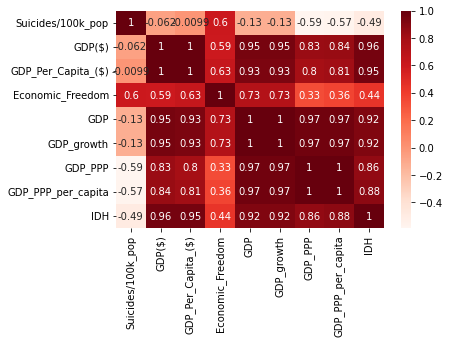

In [84]:
sns.heatmap(df_pais_std.corr(), annot = True, cmap ='Reds')

<AxesSubplot:xlabel='year', ylabel='Suicides/100k_pop'>

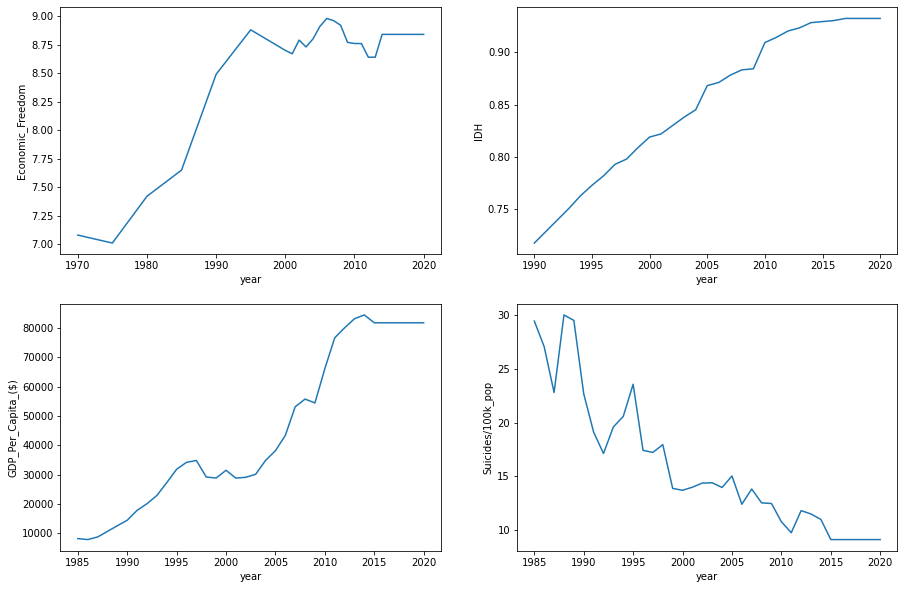

In [79]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,10))

sns.lineplot(ax=axes[0][0], data = df_pais_std, x=df_pais_std.index, y='Economic_Freedom')
#sns.regplot(x='total_bill', y='tip', data=data)
sns.lineplot(ax=axes[0][1], data = df_pais_std, x=df_pais_std.index, y='IDH')
sns.lineplot(ax=axes[1][0], data = df_pais_std, x=df_pais_std.index, y='GDP_Per_Capita_($)')
sns.lineplot(ax=axes[1][1], data = df_pais_std, x=df_pais_std.index, y='Suicides/100k_pop')

<AxesSubplot:xlabel='year', ylabel='Suicides/100k_pop'>

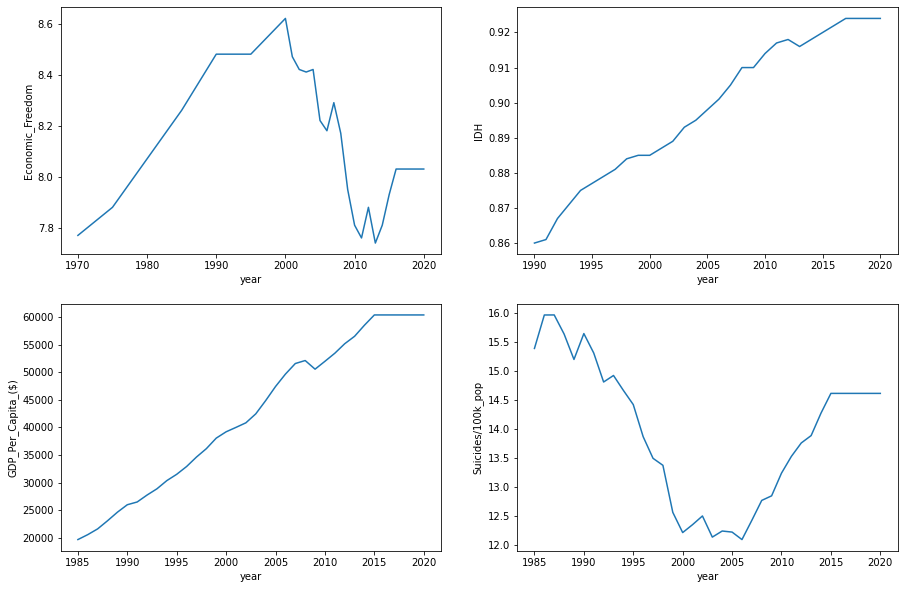

In [66]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,10))

sns.lineplot(ax=axes[0][0], data = df_pais_std, x=df_pais_std.index, y='Economic_Freedom')
sns.lineplot(ax=axes[0][1], data = df_pais_std, x=df_pais_std.index, y='IDH')
sns.lineplot(ax=axes[1][0], data = df_pais_std, x=df_pais_std.index, y='GDP_Per_Capita_($)')
sns.lineplot(ax=axes[1][1], data = df_pais_std, x=df_pais_std.index, y='Suicides/100k_pop')

In [34]:
#fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(10,5))
#t = df_HDI_std.set_index('Country').transpose()
#plt.xticks(rotation=75)
#for h in t.iloc[:,30:40]:
#    print(h)
#    sns.scatterplot(data = t, x=t.index, y=t[h], color='blue')
#sns.scatterplot(data = t, x=t.index, y=t.columns[6], color='green')
#sns.scatterplot(data = t, x=t.index, y=t.columns[7], color='yellow')
#sns.scatterplot(data = t, x=t.index, y=t.columns[8], color='red')
